## Import Packages and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("SVM.csv")

In [2]:
data = data.iloc[:, 1:]

## (1)

In [3]:
#Convert into array
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## (2)

In [4]:
#Training
linear = LinearSVC(random_state = 42, max_iter = 10000)
linear.fit(X_train, y_train)

#Predict
y_pred_linear = linear.predict(X_test)

#Accuracy
acc_linear = accuracy_score(y_test, y_pred_linear)

print(f"The accuracy is {acc_linear} ")

The accuracy is 0.5454545454545454 


## (3)

In [5]:
#Training
gaus = SVC(kernel = 'rbf', random_state = 42)
gaus.fit(X_train, y_train)

#Predict
y_pred_gaus = gaus.predict(X_test)

#Accuracy
acc_gaus = accuracy_score(y_test, y_pred_gaus)

print(f"The accuracy is {acc_gaus} ")

The accuracy is 0.9696969696969697 


## (4)

The gaussian is non-linear and therefore can hold a more complex decision boundary. The dataset may be categorized in a way where the decision boundary must be complicated to allow for better classification. 

## (5)

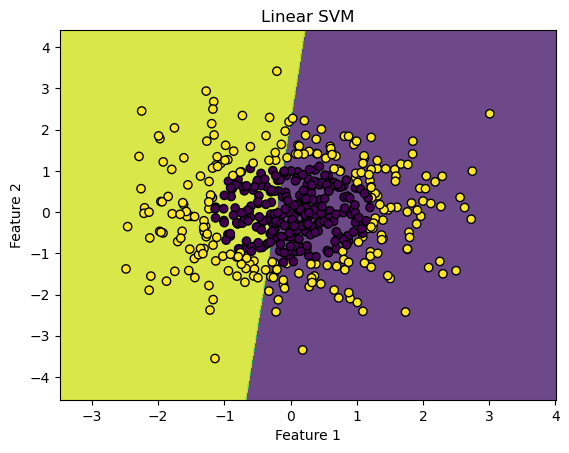

In [9]:
#decision boundary plotting model from hw2
def plot_decision_boundaries(X, y, model, title, crop = 1):
    #plt.subplot(subplot_index)
    x_min, x_max = X[:, 0].min() - crop, X[:, 0].max() + crop
    y_min, y_max = X[:, 1].min() - crop, X[:, 1].max() + crop
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundaries(X, y, linear, "Linear SVM")

## (6)

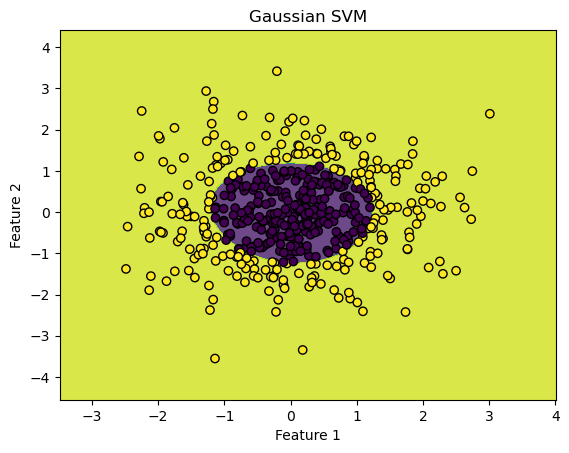

In [8]:
plot_decision_boundaries(X, y, gaus, "Gaussian SVM")